In [28]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [29]:
data_dir = "/Users/kanadb/Work/IIT-KGP Summer/cancer-research/datasets/TCGA-BRCA-CNV-tumor-Allele-Specific-10"
file_pattern = "**/*.txt"

file_paths = glob.glob(os.path.join(data_dir, file_pattern), recursive=True)

In [30]:
all_cnv_counts = []
all_merged_dfs = []

Error processing /Users/kanadb/Work/IIT-KGP Summer/cancer-research/datasets/TCGA-BRCA-CNV-tumor-Allele-Specific-10/MANIFEST.txt: 'Start'


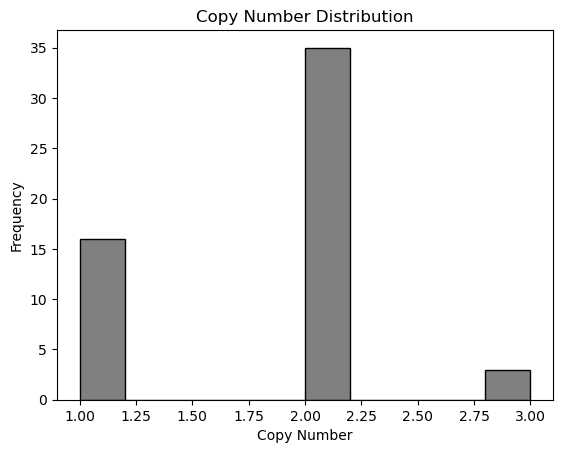

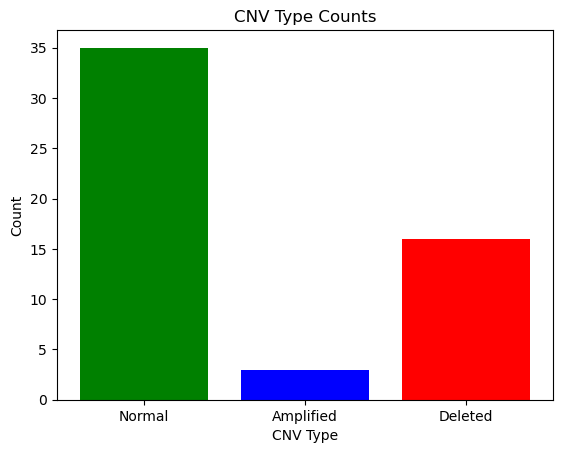

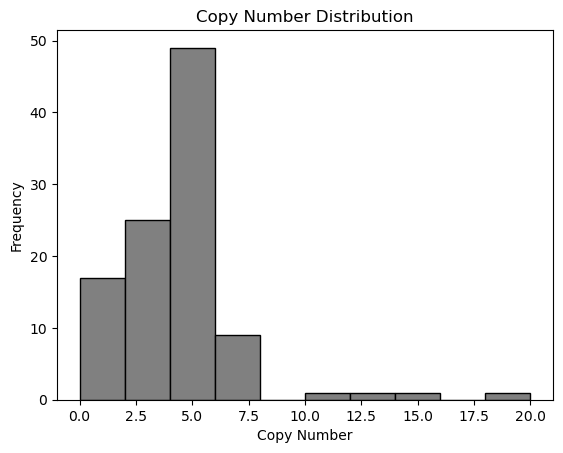

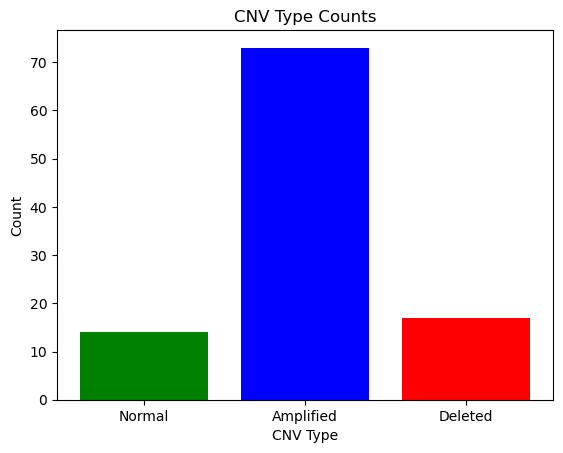

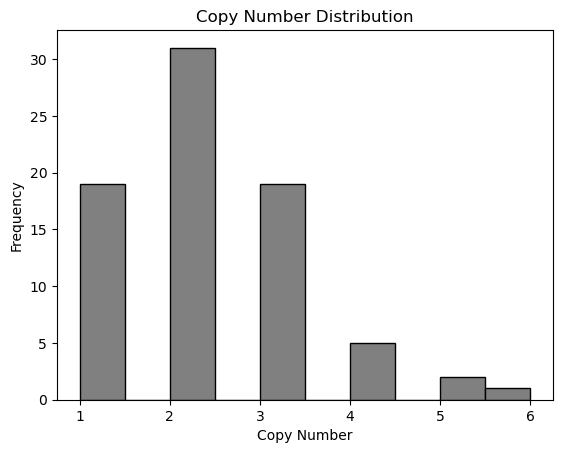

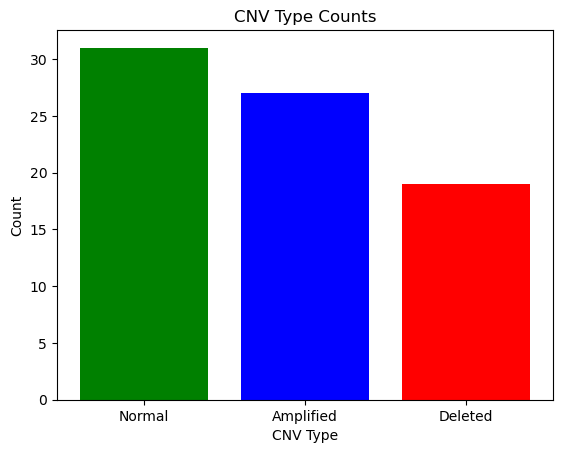

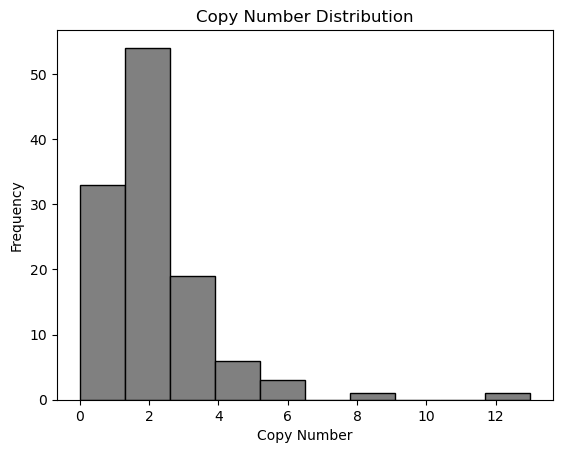

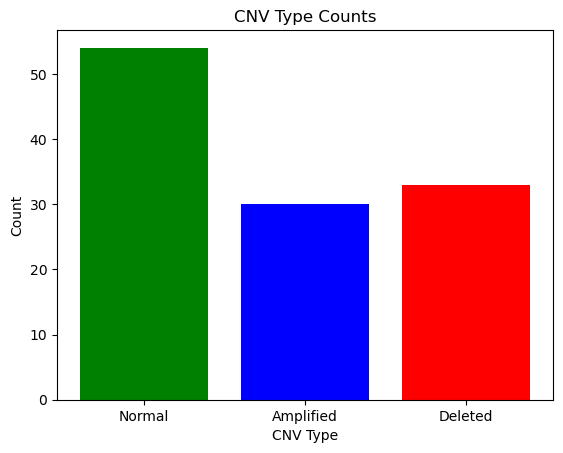

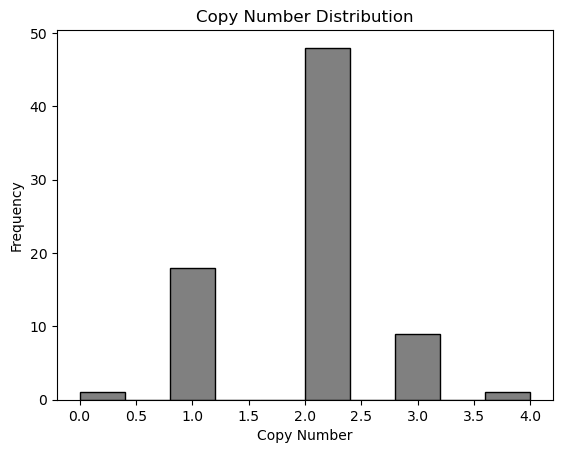

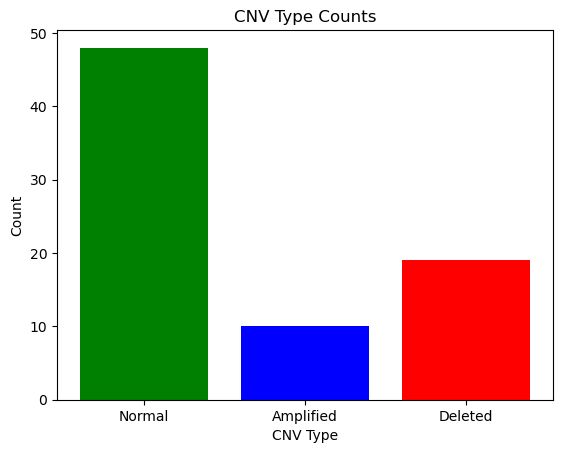

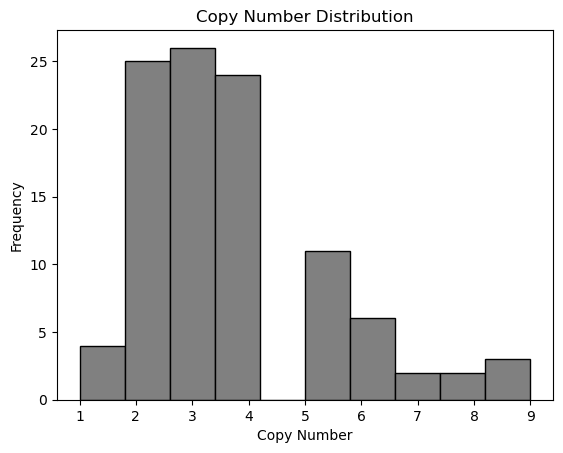

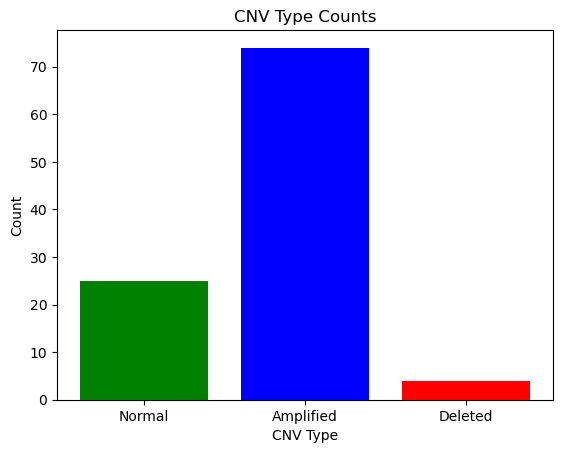

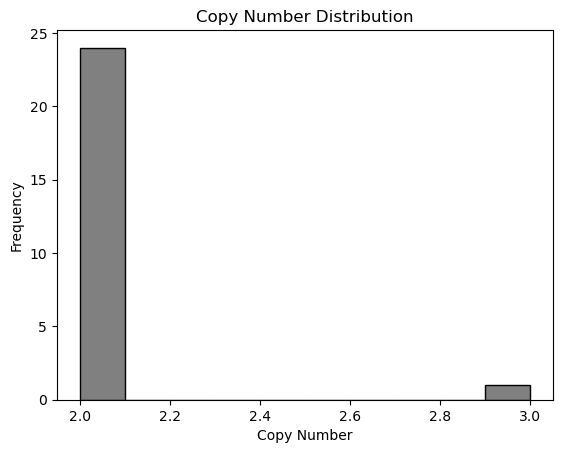

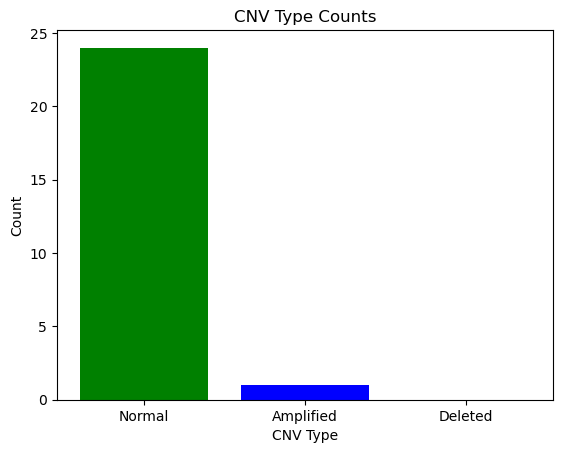

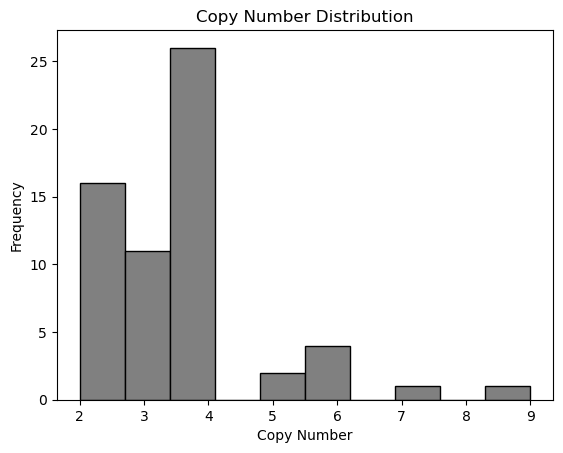

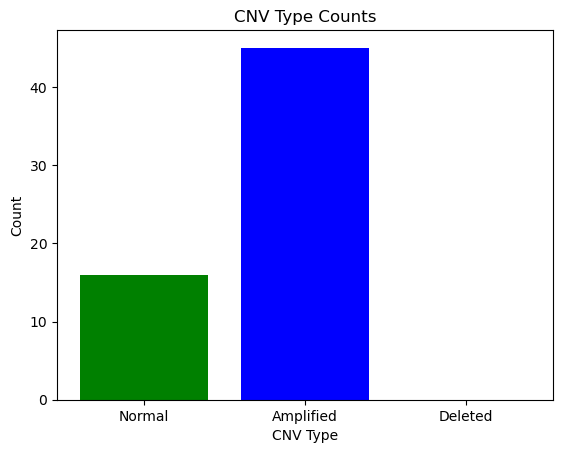

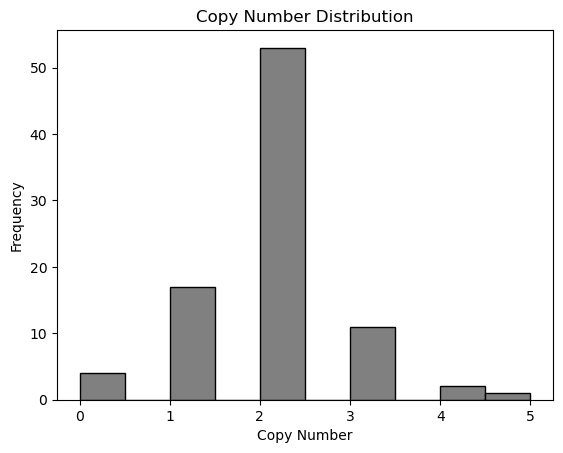

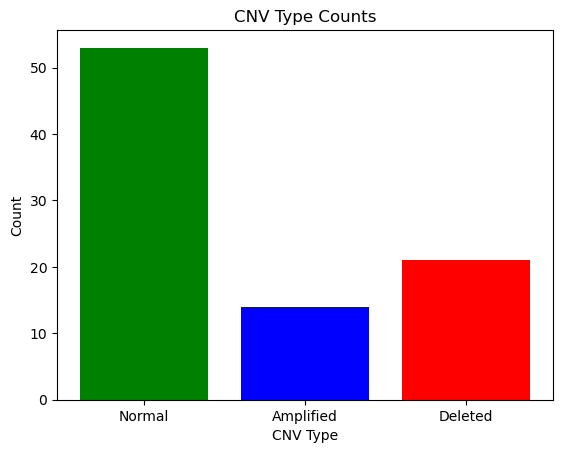

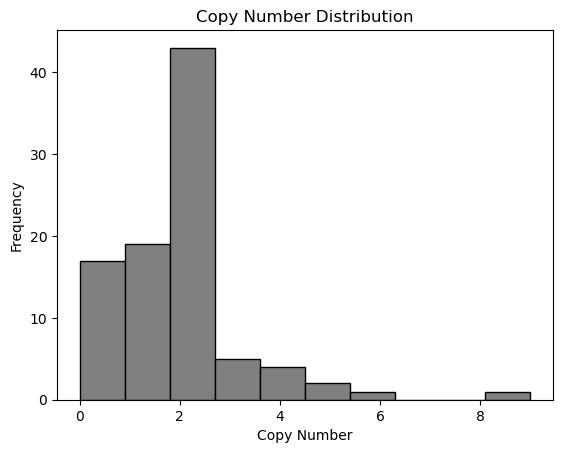

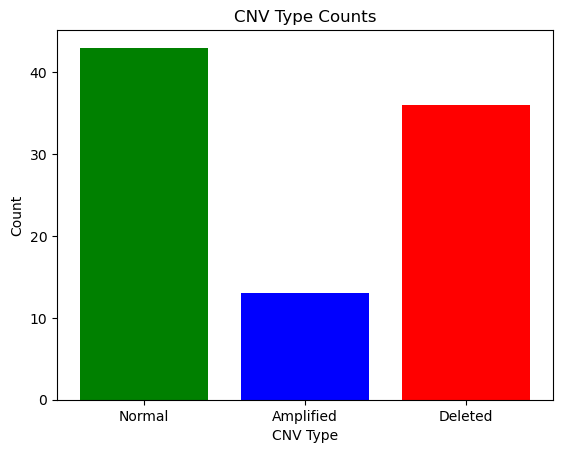

In [31]:
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

color_map = {"Normal": "green", "Amplified": "blue", "Deleted": "red"}

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, sep='\t')
        df.columns = [col.strip() for col in df.columns]

        # Convert column data type
        df['Start'] = pd.to_numeric(df['Start'], errors='coerce')
        df['End'] = pd.to_numeric(df['End'], errors='coerce')
        df['Copy_Number'] = pd.to_numeric(df['Copy_Number'], errors='coerce')
        df['Major_Copy_Number'] = pd.to_numeric(df[col], errors='coerce')
        df['Minor_Copy_Number'] = pd.to_numeric(df[col], errors='coerce')

        # Handle missing genomic positions
        df['Start'] = df['Start'].ffill().bfill()
        df['End'] = df['End'].ffill().bfill()

        # Impute missing CN values with normal value 2
        imputer = SimpleImputer(strategy='constant', fill_value=2)
        df[['Copy_Number', 'Major_Copy_Number', 'Minor_Copy_Number']] = imputer.fit_transform(
            df[['Copy_Number', 'Major_Copy_Number', 'Minor_Copy_Number']]
        )

        # Classify CNV type
        def classify(cn):
            if cn > 2:
                return "Amplified"
            elif cn < 2:
                return "Deleted"
            else:
                return "Normal"
        df['CNV_Type'] = df['Copy_Number'].apply(classify)

        # Store dataframe
        all_merged_dfs.append(df)

        # Count CNV types per sample
        cnv_counts = df['CNV_Type'].value_counts().reindex(["Amplified", "Deleted", "Normal"], fill_value=0)
        all_cnv_counts.append(cnv_counts)

        # Plot histogram of copy numbers
        plt.hist(df['Copy_Number'], color='gray', edgecolor='black')
        plt.xlabel('Copy Number')
        plt.ylabel('Frequency')
        plt.title('Copy Number Distribution')
        plt.show()

        # Plot CNV type counts
        cnv_types = df['CNV_Type'].value_counts().reindex(["Normal", "Amplified", "Deleted"], fill_value=0)
        colors = [color_map[cnv] for cnv in cnv_types.index]
        plt.bar(cnv_types.index, cnv_types.values, color=colors)
        plt.title('CNV Type Counts')
        plt.xlabel('CNV Type')
        plt.ylabel('Count')
        plt.show()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")


In [32]:
merged_df = pd.concat(all_merged_dfs, ignore_index=True)
merged_df.shape

(798, 8)

In [33]:
merged_df.head()

,GDC_Aliquot,Chromosome,Start,End,Copy_Number,Major_Copy_Number,Minor_Copy_Number,CNV_Type
0,5e5b667c-4179-45ba-882c-21d35684ae1a,chr1,61735,55235640,2,1,1,Normal
1,5e5b667c-4179-45ba-882c-21d35684ae1a,chr1,55239222,55368842,3,1,1,Amplified
2,5e5b667c-4179-45ba-882c-21d35684ae1a,chr1,55369260,248930189,2,1,1,Normal
3,5e5b667c-4179-45ba-882c-21d35684ae1a,chr2,12784,242147305,2,1,1,Normal
4,5e5b667c-4179-45ba-882c-21d35684ae1a,chr3,18667,198169247,2,1,1,Normal


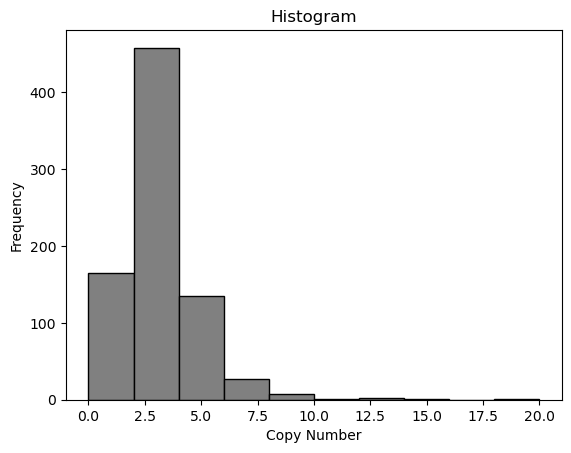

In [34]:
plt.hist(merged_df['Copy_Number'], color='gray', edgecolor='black')

plt.title('Histogram')
plt.xlabel('Copy Number')
plt.ylabel('Frequency')

plt.show()

In [35]:
cnv_types = merged_df['CNV_Type'].value_counts().sort_index()
cnv_types

CNV_Type
Amplified    290
Deleted      165
Normal       343
Name: count, dtype: int64

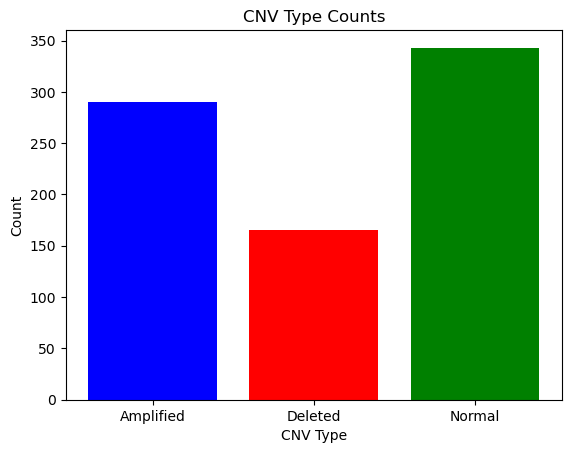

In [36]:
plt.bar(cnv_types.index, cnv_types.values, color=['blue', 'red', 'green'])

plt.title('CNV Type Counts')
plt.xlabel('CNV Type')
plt.ylabel('Count')

plt.show()

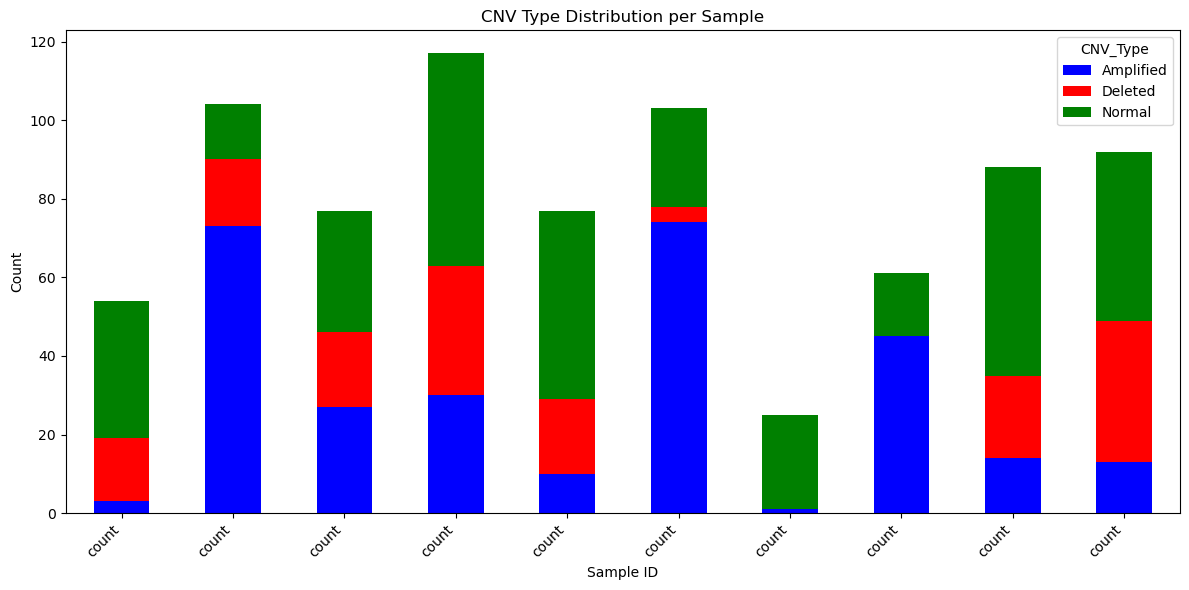

In [37]:
cnv_summary_df = pd.DataFrame(all_cnv_counts)

cnv_summary_df_sorted = cnv_summary_df.sort_index()

cnv_summary_df_sorted.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'], figsize=(12, 6))
plt.title('CNV Type Distribution per Sample')
plt.xlabel('Sample ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()